In [28]:
import numpy as np
import pandas as pd
import os
from sklearn import tree
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
from utils import load_mnist_trainval, load_mnist_test

# Loading Data

In [5]:
path = os.getcwd()
print(path)

/Users/shangwenhuang/Documents/omscs_ML/Assignment1


In [8]:
data = pd.read_csv(path + "/data/Loan_prediction_dataset/train_loan_prediction.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
X = data[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome"
               ,"CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]]

In [11]:
Y = data["Loan_Status"]

In [12]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
X[['Gender']].value_counts()

Gender
Male      489
Female    112
dtype: int64

In [14]:
X[['Married']].value_counts()

Married
Yes        398
No         213
dtype: int64

In [15]:
X[['Dependents']].value_counts()

Dependents
0             345
1             102
2             101
3+             51
dtype: int64

In [16]:
X[['Education']].value_counts()

Education   
Graduate        480
Not Graduate    134
dtype: int64

In [17]:
X[['Property_Area']].value_counts()

Property_Area
Semiurban        233
Urban            202
Rural            179
dtype: int64

In [18]:
X[['Self_Employed']].value_counts()

Self_Employed
No               500
Yes               82
dtype: int64

In [19]:
Y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
X = pd.get_dummies(X, columns = ['Gender','Married','Dependents','Education','Property_Area','Self_Employed'])

In [21]:
X.fillna(0, inplace = True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [24]:
X_train.shape

(429, 20)

In [762]:
from utils import load_csv, load_mnist_trainval, load_mnist_test

ImportError: cannot import name 'load_csv' from 'utils' (/Users/shangwenhuang/Documents/omscs_ML/Assignment1/utils.py)

# Exp1: Decision tree without pruning

In [93]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [94]:
dot_data = tree.export_graphviz(clf, out_file = None,
                               feature_names = list(X.columns),
                                class_names = ["Y", "N"],
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)

In [95]:
graph.render(filename='img/decision_tree_exp1')

'img/decision_tree_exp1.pdf'

In [98]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7243243243243244


### Exp1.1: Decision tree with prunning

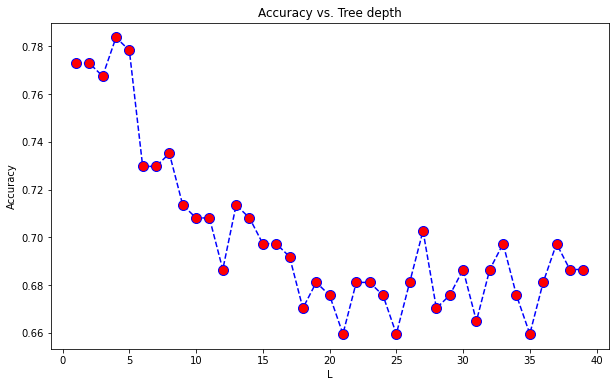

In [29]:
acc = []
for i in range(1,40):
    clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color='blue',linestyle='dashed', marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy vs. Tree depth')
plt.xlabel('L')
plt.ylabel('Accuracy')
plt.show()

In [30]:
acc

[0.772972972972973,
 0.772972972972973,
 0.7675675675675676,
 0.7837837837837838,
 0.7783783783783784,
 0.7297297297297297,
 0.7297297297297297,
 0.7351351351351352,
 0.7135135135135136,
 0.7081081081081081,
 0.7081081081081081,
 0.6864864864864865,
 0.7135135135135136,
 0.7081081081081081,
 0.6972972972972973,
 0.6972972972972973,
 0.6918918918918919,
 0.6702702702702703,
 0.6810810810810811,
 0.6756756756756757,
 0.6594594594594595,
 0.6810810810810811,
 0.6810810810810811,
 0.6756756756756757,
 0.6594594594594595,
 0.6810810810810811,
 0.7027027027027027,
 0.6702702702702703,
 0.6756756756756757,
 0.6864864864864865,
 0.6648648648648648,
 0.6864864864864865,
 0.6972972972972973,
 0.6756756756756757,
 0.6594594594594595,
 0.6810810810810811,
 0.6972972972972973,
 0.6864864864864865,
 0.6864864864864865]

# Exp2: Neural Network

In [701]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import time
import random
from torch.utils.data import Dataset, DataLoader
import copy

In [702]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.inputs = torch.tensor(X.to_numpy())
        self.target = torch.tensor(np.where(y == "Y", 1, 0))
        
    def __len__(self):
        return len(self.target)
    
    def __getitem__(self, idx):
        inputs = self.inputs[idx]
        target = self.target[idx]
        return inputs, target

In [703]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [704]:
training_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
validation_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

In [705]:
# defining the network
class Net(nn.Module):
    def __init__(self, n_input):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_input, 32)
        self.fc2 = nn.Linear(32, 1)
  
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [706]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("[INFO] training using {}...".format(DEVICE))

[INFO] training using cpu...


In [721]:
#hyper parameters
learning_rate = 0.01
batch_size = 128
epochs = 10
# Model, Optimizer, Loss
model = Net(n_input = X_train_array.shape[1])
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [722]:
def train(epoch, training_loader, model, optimizer, debug=True):
    epoch_loss = 0.0
    hits = 0
    count_samples = 0
    
    for idx, data in enumerate(training_loader):
        inputs, target = data
        
        # Zero gradients for every batch
        optimizer.zero_grad()
        
        # Make predictions for this batch
        start_time = time.time()
        pred = model(inputs.float())
        
        # Compute the loss and its gradients
        loss = loss_function(pred, target.float())
        loss.backward()
        
        # Adjust learning weights
        optimizer.step()
        
        # Compute accuracy
        correct = (pred > 0.5) == target.reshape(-1,1)
        accuracy = correct.sum()/len(target)
        

        
        epoch_loss += loss
        hits += accuracy * len(target) #count of accurate prediction
        count_samples += len(target)   # count of total sample data have been trained on
        
        forward_time = time.time() - start_time
        if idx % 1 == 0 and debug:
            print(('Epoch: [{0}][{1}/{2}]\t'
                  'Batch Time {batch_time:.3f} \t'
                  'Batch Loss {loss:.4f}\t'
                  'Train Accuracy' + "{accuracy:.4f}" '\t').format(
            epoch, idx, training_loader.__len__(), batch_time = forward_time, loss = loss, accuracy = accuracy))
            
    epoch_loss /= training_loader.__len__()
    epoch_acc = hits / count_samples
    return epoch_loss, epoch_acc
        

In [723]:
def evaluate(validation_loader, model, debug=True):
    epoch_loss = 0.0
    hits = 0
    count_samples = 0.0
    for idx, data in enumerate(validation_loader):
        inputs, target = data
        pred = model(inputs.float())
        loss = loss_function(pred, target)
        correct = (pred > 0.5) == target.reshape(-1,1)
        accuracy = correct.sum()/len(target)
        
        epoch_loss += loss
        hits += accuracy * len(target)
        count_samples += len(target)
        if debug:
            print(('Evaluate: [{0}/{1}]\t'
                  'Batch Accuracy' + "{accuracy:.4f}" '\t').format(
            idx, validation_loader.__len__(), accuracy=accuracy))
            
    epoch_loss /= validation_loader.__len__()
    epoch_acc = hits / count_samples

    return epoch_loss, epoch_acc

In [724]:
def plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history):
    """
    Plot learning curves with matplotlib. Make sure training loss and validation loss are plot in the same figure and
    training accuracy and validation accuracy are plot in the same figure too.
    :param train_loss_history: training loss history of epochs
    :param train_acc_history: training accuracy history of epochs
    :param valid_loss_history: validation loss history of epochs
    :param valid_acc_history: validation accuracy history of epochs
    :return: None, save two figures in the current directory
    """
    
    print(train_acc_history)
    print(valid_acc_history)
    print(train_loss_history)
    print(valid_loss_history)
    epochs = range(1, 11)
    f = plt.figure(1)
    plt.plot(epochs, train_loss_history, 'g', label = 'Training loss')
    plt.plot(epochs, valid_loss_history, 'b', label = 'Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    f.show()
    plt.savefig('Loss.png')
    
    g = plt.figure(2)
    plt.plot(epochs, train_acc_history, 'g', label = 'Training accuracy')
    plt.plot(epochs, valid_acc_history, 'b', label = 'Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    g.show()
    plt.savefig('Accuracy.png')

In [725]:
def main():
    train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run()

    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [726]:
def run():
    train_loss_history = []
    train_acc_history = []
    valid_loss_history = []
    valid_acc_history = []
    best_acc = 0.0
    best_model = None
    for epoch in range(epochs):
        
        # Make sure gradient tracking is on, and do a pass over the data
        model.train(True)
        epoch_loss, epoch_acc = train(epoch, training_loader, model, optimizer, debug=True)
        
        epoch_loss = epoch_loss.detach().numpy()
        
        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_acc)
        
        # We don't need gradients to do reporting
        model.train(False)
        
        #evaluate on test data
        valid_loss, valid_acc = evaluate(validation_loader, model, debug=True)
        
        valid_loss = valid_loss.detach().numpy()
       
        print("* Validation Accuracy: {accuracy:.4f}".format(accuracy=valid_acc))
            
        valid_loss_history.append(valid_loss)
        valid_acc_history.append(valid_acc)
        
        if valid_acc > best_acc:
            best_acc = valid_acc
            best_model = copy.deepcopy(model)
            

    _, test_acc = evaluate(validation_loader, best_model, debug=True)
    
    print("Final Accuracy on Test Data: {accuracy:.4f}".format(accuracy=test_acc))

    return train_loss_history, train_acc_history, valid_loss_history, valid_acc_history
            
        

Epoch: [0][0/4]	Batch Time 0.004 	Batch Loss 0.7031	Train Accuracy0.2969	
Epoch: [0][1/4]	Batch Time 0.002 	Batch Loss 0.6719	Train Accuracy0.3281	
Epoch: [0][2/4]	Batch Time 0.001 	Batch Loss 0.7031	Train Accuracy0.2969	
Epoch: [0][3/4]	Batch Time 0.001 	Batch Loss 0.7111	Train Accuracy0.2889	
Evaluate: [0/2]	Batch Accuracy0.3359	
Evaluate: [1/2]	Batch Accuracy0.3158	
* Validation Accuracy: 0.3297
Epoch: [1][0/4]	Batch Time 0.001 	Batch Loss 0.6953	Train Accuracy0.3047	
Epoch: [1][1/4]	Batch Time 0.001 	Batch Loss 0.6797	Train Accuracy0.3203	
Epoch: [1][2/4]	Batch Time 0.001 	Batch Loss 0.7188	Train Accuracy0.2812	
Epoch: [1][3/4]	Batch Time 0.001 	Batch Loss 0.6667	Train Accuracy0.3333	
Evaluate: [0/2]	Batch Accuracy0.3359	
Evaluate: [1/2]	Batch Accuracy0.3158	
* Validation Accuracy: 0.3297
Epoch: [2][0/4]	Batch Time 0.001 	Batch Loss 0.6797	Train Accuracy0.3203	
Epoch: [2][1/4]	Batch Time 0.001 	Batch Loss 0.6797	Train Accuracy0.3203	
Epoch: [2][2/4]	Batch Time 0.001 	Batch Loss 0.6

/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_14077/1667878697.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_14077/1667878697.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


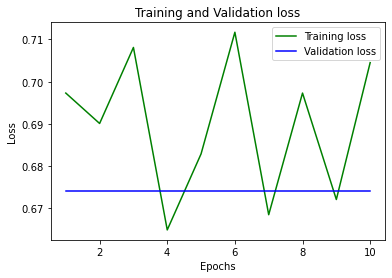

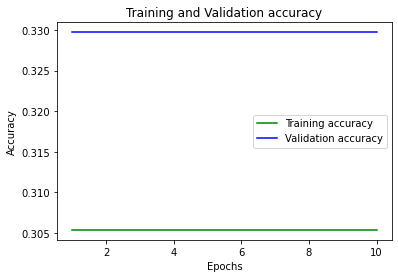

In [727]:

if __name__ == '__main__':
    main()

# Exp3: Boosting

In [728]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

In [742]:
y = pd.DataFrame(np.where(Y=="Y",1,0))
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index],
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [743]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [745]:
gradient_booster.fit(X_train, y_train)
print(classification_report(y_val, gradient_booster.predict(X_val)))

              precision    recall  f1-score   support

           0       0.65      0.36      0.46        36
           1       0.77      0.92      0.84        86

    accuracy                           0.75       122
   macro avg       0.71      0.64      0.65       122
weighted avg       0.74      0.75      0.73       122



/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Exp4: Support Vector Machine

In [748]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [747]:
y = np.where(Y=="Y", 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [749]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7135135135135136


# Exp5: KNN

In [750]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [751]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = np.where(Y=="Y", 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [752]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4", metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 0.654054054054054


Minimum error:- 0.2756756756756757 at K = 8


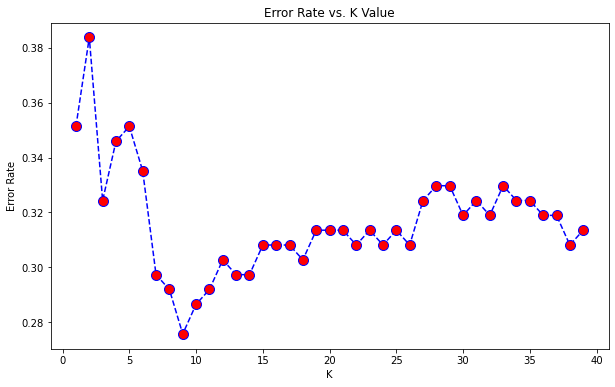

In [753]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7243243243243244 at K = 8


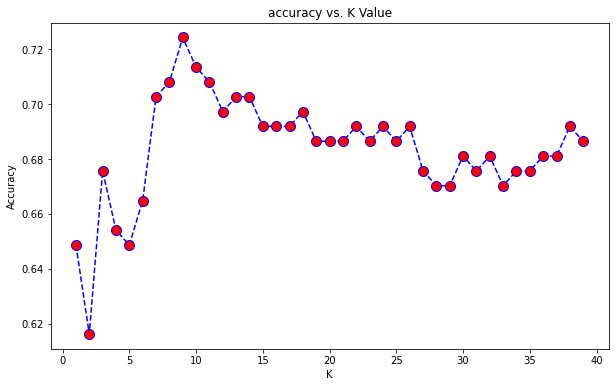

In [754]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

AttributeError: 'list' object has no attribute 'shape'